# Problem Statement
List of 278k Wildfires in the USA occurring between 2004 - 2015 that had lightning as the main cause.

Dataset Column Descriptions:
- FIRE_YEAR - Year when the fire happened
- DISCOVERY_TIME - Time in hours when the fire was discovered
- STATCAUSEDESCR - Cause of the Fire (Here, Lightning)
- Daystoextinguish_fire - No.of Days it took to extinguish the fire
- CONT_TIME - Time at which the fire was extinguished
- FIRE_SIZE - Size of the fire in Acres
- LATITUDE & LONGITUDE where the fire erupted.
- STATE - The US State where the fire began.
- FIPS AND FIPS Name - Identifying US Counties and Fips.

We would be using some of the `EDA` and `Data Visualization` techniques to get some insights into this dataset. 

In [1]:
# !pip install keplergl

In [2]:
# Dependancies

import pandas as pd
import numpy as np
from keplergl import KeplerGl 

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading Dataset

data = pd.read_csv('US_Lightning_Forest_Fires.csv')
data.head()

,Unnamed: 0,index,FIRE_YEAR,Fire_Date,DISCOVERY_TIME,STAT_CAUSE_DESCR,Days_to_extinguish_fire,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,FIPS_CODE,FIPS_NAME
0,0,1,2004,05-12-2004,845.0,Lightning,0.0,1530.0,0.25,A,38.933056,-120.404444,CA,61.0,Placer
1,1,3,2004,06-28-2004,1600.0,Lightning,5.0,1400.0,0.10,A,38.559167,-119.913333,CA,3.0,Alpine
2,2,4,2004,06-28-2004,1600.0,Lightning,5.0,1200.0,0.10,A,38.559167,-119.933056,CA,3.0,Alpine
3,3,5,2004,06-30-2004,1800.0,Lightning,1.0,1600.0,0.10,A,38.635278,-120.103611,CA,5.0,Amador
4,4,6,2004,07-01-2004,1800.0,Lightning,1.0,1400.0,0.10,A,38.688333,-120.153333,CA,17.0,El Dorado


In [4]:
data.shape

(278468, 15)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278468 entries, 0 to 278467
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               278468 non-null  int64  
 1   index                    278468 non-null  int64  
 2   FIRE_YEAR                278468 non-null  int64  
 3   Fire_Date                278468 non-null  object 
 4   DISCOVERY_TIME           228272 non-null  float64
 5   STAT_CAUSE_DESCR         278468 non-null  object 
 6   Days_to_extinguish_fire  227876 non-null  float64
 7   CONT_TIME                220068 non-null  float64
 8   FIRE_SIZE                278468 non-null  float64
 9   FIRE_SIZE_CLASS          278468 non-null  object 
 10  LATITUDE                 278468 non-null  float64
 11  LONGITUDE                278468 non-null  float64
 12  STATE                    278468 non-null  object 
 13  FIPS_CODE                156911 non-null  float64
 14  FIPS

Dataset is having staggering 278468 entries. We can also observe a few null entries.

In [6]:
# Data cleaning and preparation

# dropping unnecessary columns
data = data.drop(['Unnamed: 0', 'index', 'STAT_CAUSE_DESCR'], axis=1)

# Chnaging datatype for 'Fire_Date' column
data['Fire_Date'] = pd.to_datetime(data['Fire_Date'])

# Changing name
data = data.rename(columns={"LATITUDE": "Latitude", "LONGITUDE": "Longitude"})

data.head()

,FIRE_YEAR,Fire_Date,DISCOVERY_TIME,Days_to_extinguish_fire,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,Latitude,Longitude,STATE,FIPS_CODE,FIPS_NAME
0,2004,2004-05-12,845.0,0.0,1530.0,0.25,A,38.933056,-120.404444,CA,61.0,Placer
1,2004,2004-06-28,1600.0,5.0,1400.0,0.10,A,38.559167,-119.913333,CA,3.0,Alpine
2,2004,2004-06-28,1600.0,5.0,1200.0,0.10,A,38.559167,-119.933056,CA,3.0,Alpine
3,2004,2004-06-30,1800.0,1.0,1600.0,0.10,A,38.635278,-120.103611,CA,5.0,Amador
4,2004,2004-07-01,1800.0,1.0,1400.0,0.10,A,38.688333,-120.153333,CA,17.0,El Dorado


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278468 entries, 0 to 278467
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   FIRE_YEAR                278468 non-null  int64         
 1   Fire_Date                278468 non-null  datetime64[ns]
 2   DISCOVERY_TIME           228272 non-null  float64       
 3   Days_to_extinguish_fire  227876 non-null  float64       
 4   CONT_TIME                220068 non-null  float64       
 5   FIRE_SIZE                278468 non-null  float64       
 6   FIRE_SIZE_CLASS          278468 non-null  object        
 7   Latitude                 278468 non-null  float64       
 8   Longitude                278468 non-null  float64       
 9   STATE                    278468 non-null  object        
 10  FIPS_CODE                156911 non-null  float64       
 11  FIPS_NAME                156911 non-null  object        
dtypes: datetime64[ns

#### Null values treatment

Days_to_extinguish_fire Median 0.0
Days_to_extinguish_fire Mean 2.9275088205866346


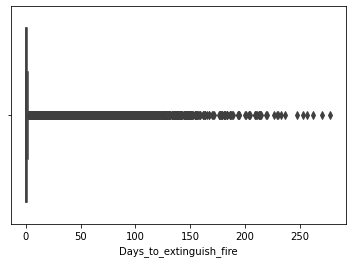

In [8]:
# 'Days_to_extinguish_fire' columns stats

# Day to extinguish fire can't be negatve value hence using 'abs'
data['Days_to_extinguish_fire'] = data['Days_to_extinguish_fire'].abs()

# Box plottin the updated data
sns.boxplot(data['Days_to_extinguish_fire'])

print('Days_to_extinguish_fire Median', data['Days_to_extinguish_fire'].median())
print('Days_to_extinguish_fire Mean', data['Days_to_extinguish_fire'].mean())

We can observe that there are many outliers in this column(`Days_to_extinguish_fire`). Hence, we would be using median value to replace null entries.

DISCOVERY_TIME Median 1510.0
DISCOVERY_TIME Mean 1454.0133437302866


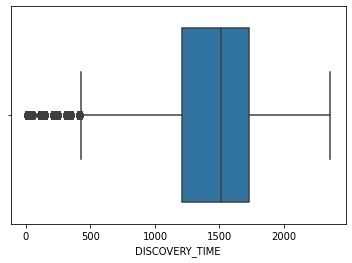

In [9]:
# Boxplotting
sns.boxplot(data['DISCOVERY_TIME'])

print('DISCOVERY_TIME Median', data['DISCOVERY_TIME'].median())
print('DISCOVERY_TIME Mean', data['DISCOVERY_TIME'].mean())

We can observe that there are many outliers in this column(`DISCOVERY_TIME`). Hence, we would be using median value to replace null entries.

In [10]:
# Replace NaN

data['DISCOVERY_TIME'] = data['DISCOVERY_TIME'].fillna(data['DISCOVERY_TIME'].median())
data['Days_to_extinguish_fire'] = data['Days_to_extinguish_fire'].fillna(data['Days_to_extinguish_fire'].median())

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278468 entries, 0 to 278467
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   FIRE_YEAR                278468 non-null  int64         
 1   Fire_Date                278468 non-null  datetime64[ns]
 2   DISCOVERY_TIME           278468 non-null  float64       
 3   Days_to_extinguish_fire  278468 non-null  float64       
 4   CONT_TIME                220068 non-null  float64       
 5   FIRE_SIZE                278468 non-null  float64       
 6   FIRE_SIZE_CLASS          278468 non-null  object        
 7   Latitude                 278468 non-null  float64       
 8   Longitude                278468 non-null  float64       
 9   STATE                    278468 non-null  object        
 10  FIPS_CODE                156911 non-null  float64       
 11  FIPS_NAME                156911 non-null  object        
dtypes: datetime64[ns

In [12]:
data.head()

,FIRE_YEAR,Fire_Date,DISCOVERY_TIME,Days_to_extinguish_fire,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,Latitude,Longitude,STATE,FIPS_CODE,FIPS_NAME
0,2004,2004-05-12,845.0,0.0,1530.0,0.25,A,38.933056,-120.404444,CA,61.0,Placer
1,2004,2004-06-28,1600.0,5.0,1400.0,0.10,A,38.559167,-119.913333,CA,3.0,Alpine
2,2004,2004-06-28,1600.0,5.0,1200.0,0.10,A,38.559167,-119.933056,CA,3.0,Alpine
3,2004,2004-06-30,1800.0,1.0,1600.0,0.10,A,38.635278,-120.103611,CA,5.0,Amador
4,2004,2004-07-01,1800.0,1.0,1400.0,0.10,A,38.688333,-120.153333,CA,17.0,El Dorado


## Fire Size Vs Fire Class

<AxesSubplot:xlabel='FIRE_SIZE_CLASS', ylabel='FIRE_SIZE'>

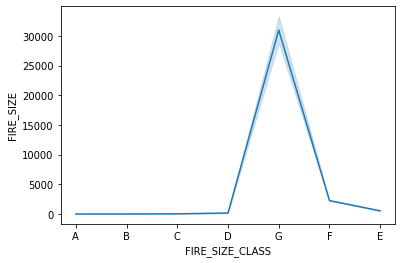

In [13]:
sns.lineplot(x = data.FIRE_SIZE_CLASS,
            y = data.FIRE_SIZE)

Class `G` fires have the largest area cover and certainly cause more devastating effects.

## Geospatial Mapping

In [14]:
# Temporary dataset

df = data[['Latitude', 'Longitude', 'FIRE_SIZE']]
df.head()

,Latitude,Longitude,FIRE_SIZE
0,38.933056,-120.404444,0.25
1,38.559167,-119.913333,0.10
2,38.559167,-119.933056,0.10
3,38.635278,-120.103611,0.10
4,38.688333,-120.153333,0.10


In [15]:
map_fire = KeplerGl()

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


In [16]:
map_fire.add_data(data=df, name='US Fires due to Lightening Visualization')
map_fire
map_fire.save_to_html()

Map saved to keplergl_map.html!


The saved `html` file can be opened using any browser. We can observe that some states have large size fire breakouts as compared to others. (Texas, Florida) It may be combination of their hot weather and lightening.

## Historic Plot

<AxesSubplot:xlabel='FIRE_YEAR', ylabel='Count'>

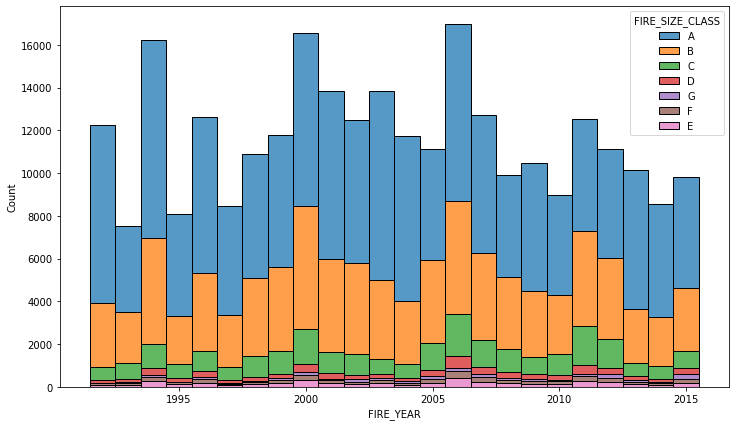

In [17]:
plt.subplots(figsize=(12,7))
sns.histplot(x = 'FIRE_YEAR',
            data = data,
            discrete = True,
            hue = 'FIRE_SIZE_CLASS',
            multiple = 'stack')

In recent years, number of fires have reduced. Over the year, majority of fires are of class `A`,`B`, and `C`.

## Annual/Seasonality Plot

<AxesSubplot:xlabel='FIRE_MONTH', ylabel='Count'>

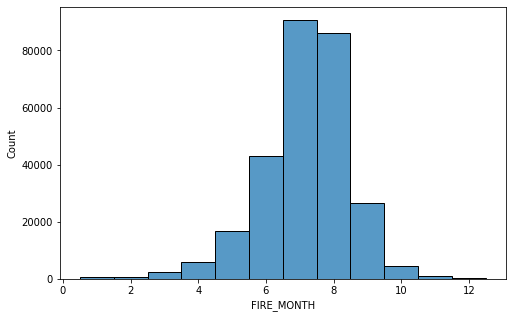

In [18]:
data['FIRE_MONTH'] = data['Fire_Date'].dt.month
plt.subplots(figsize=(8,5))
sns.histplot(x = 'FIRE_MONTH',
             data = data, 
             discrete=True)

An obvious seasonality can be observed in this plot. Tighter controls can be deployed during the months from `May` to `September`.

## Fire Discovery Time Vs Fire Class Vs Year

<AxesSubplot:xlabel='FIRE_YEAR', ylabel='DISCOVERY_TIME'>

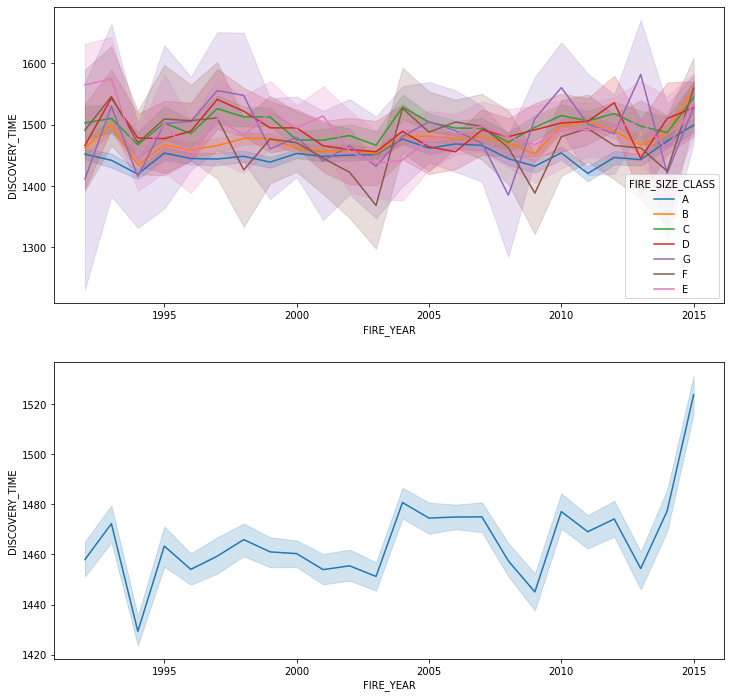

In [19]:
plt.subplots(figsize=(12,12))
plt.subplot(2,1,1)
sns.lineplot(x = 'FIRE_YEAR',
            y = 'DISCOVERY_TIME',
            data = data,
            hue = 'FIRE_SIZE_CLASS')

plt.subplot(2,1,2)
sns.lineplot(x = 'FIRE_YEAR',
            y = 'DISCOVERY_TIME',
            data = data)

It indicates that over the years, the discovery time has increased with lesser variance. It indicates more lapse although technologies have improved.

## Fire Extinguish Time Vs Fire Class Vs Year

<AxesSubplot:xlabel='FIRE_YEAR', ylabel='Days_to_extinguish_fire'>

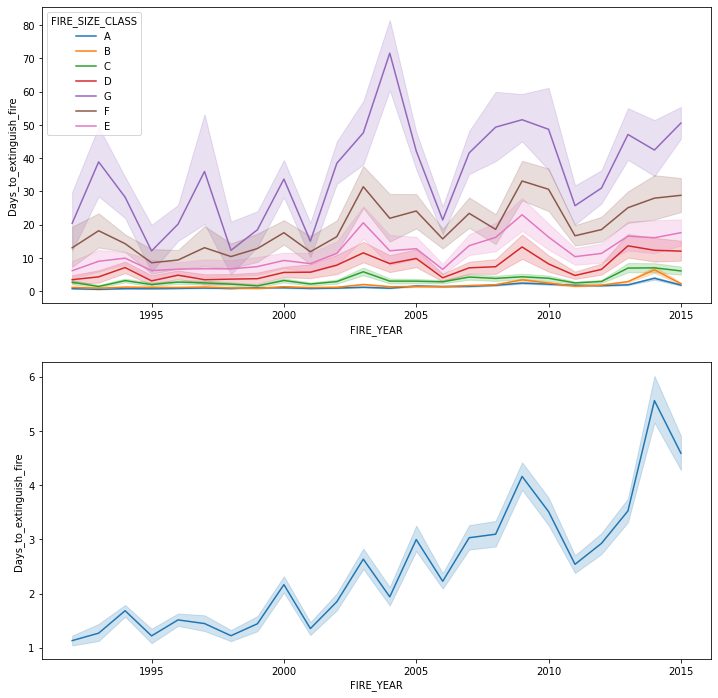

In [20]:
plt.subplots(figsize=(12,12))
plt.subplot(2,1,1)
sns.lineplot(x = 'FIRE_YEAR',
            y = 'Days_to_extinguish_fire',
            data = data,
            hue = 'FIRE_SIZE_CLASS')

plt.subplot(2,1,2)
sns.lineplot(x = 'FIRE_YEAR',
            y = 'Days_to_extinguish_fire',
            data = data)

Class `G` fires are the most severe and takes more time to extinguish. In the recent past, these kind of fires have increased. We can observe that the median fire extinguishing time has increased due to class `G` fires.

# Conclusion

- Class `G` fires have the largest area cover, wide spread discovery times, largest extinguishing time and relatively fewer in counts.
- In recent past, we have observed more class `G` fires, which needs to be reduces to avoid severe environmental and biological damage.
- An alarming observation can be on prolonged fire discovery time in the recent past. Reason can be anything from negligence to migration to dense cities. An investigation can be launched to discover the main cause behind it.

--------------------